In [0]:
!wget "https://www.dropbox.com/s/rdopg37q6czn14l/dataset.zip"

--2020-03-16 11:37:35--  https://www.dropbox.com/s/rdopg37q6czn14l/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/rdopg37q6czn14l/dataset.zip [following]
--2020-03-16 11:37:35--  https://www.dropbox.com/s/raw/rdopg37q6czn14l/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7504b19399c8b733a3aea5f4ad.dl.dropboxusercontent.com/cd/0/inline/A0DH8qOORuVcs625RX7b9fGkmQ_3SwL1jgial8lHwNic9YmxSLpEaaZGnmvnoPkXniCnLMrta1LAhW6byDgPBAa4rxBCvJrWGVlMhGYE-9LJqiwMVXlFMv8WwG7wmAEzJK4/file# [following]
--2020-03-16 11:37:36--  https://uc7504b19399c8b733a3aea5f4ad.dl.dropboxusercontent.com/cd/0/inline/A0DH8qOORuVcs625RX7b9fGkmQ_3SwL1jgial8lHwNic9YmxSLpEaaZGnmvnoPkXniCnLMrta1LAhW6byDgPBAa4rxBCvJrWGVlMhGYE-9LJqiwMVXlFM

In [0]:
!unzip dataset.zip

Archive:  dataset.zip
replace dataset/test/0/(131).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: dataset/test/0/(131).png  
 extracting: dataset/test/0/(140).png  
 extracting: dataset/test/0/(141).png  
 extracting: dataset/test/0/(142).png  
 extracting: dataset/test/0/(151).png  
 extracting: dataset/test/0/(152).png  
 extracting: dataset/test/0/(153).png  
  inflating: dataset/test/0/(162).png  
  inflating: dataset/test/0/(163).png  
  inflating: dataset/test/0/(164).png  
 extracting: dataset/test/10/(127).png  
 extracting: dataset/test/10/(55).png  
 extracting: dataset/test/10/(59).png  
 extracting: dataset/test/10/(63).png  
 extracting: dataset/test/10/(64).png  
 extracting: dataset/test/10/(65).png  
 extracting: dataset/test/10/(68).png  
 extracting: dataset/test/10/(69).png  
 extracting: dataset/test/11/(108).png  
  inflating: dataset/test/11/(111).png  
  inflating: dataset/test/11/(112).png  
  inflating: dataset/test/11/(116).png  
 extracting: datase

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import  confusion_matrix

import keras
from keras import backend as K
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.utils.vis_utils import model_to_dot
from keras.utils.generic_utils import get_custom_objects
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D
from keras.layers import Activation, Add, BatchNormalization, Dropout


In [0]:
model = Sequential()

model.add(Conv2D(activation ='relu', input_shape = (100,100,3), filters=64, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(activation ='relu',filters=64, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(activation ='relu',filters=64, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(units = 12, activation='softmax'))

model.summary()

optimizer = Adam  (lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         


In [0]:
train_datagen = ImageDataGenerator(
                                    rotation_range=40,
                                    width_shift_range=0.4,
                                    height_shift_range=0.4,
                                    rescale=1/255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='nearest')


test_datagen = ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.4,
                                    height_shift_range=0.4,
                                    rescale=1/255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='nearest')

In [0]:
train_generator = train_datagen.flow_from_directory(
                                                    'dataset/train',
                                                    target_size=(100, 100),
                                                    batch_size=80,
                                                    color_mode='rgb',
                                                    class_mode='categorical'
                                                     )

validation_generator = test_datagen.flow_from_directory(
                                                    'dataset/test',
                                                    target_size=(100, 100),
                                                    batch_size=20,
                                                    color_mode='rgb',
                                                    class_mode='categorical' 
                                                     )

Found 989 images belonging to 12 classes.
Found 359 images belonging to 12 classes.


In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)

In [0]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=4000 /20,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1,
                    callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





200/200 [==============================] - 444s 2s/step - loss: 0.8847 - acc: 0.6695 - val_loss: 0.4310 - val_acc: 0.8176
Epoch 2/20
200/200 [==============================] - 437s 2s/step - loss: 0.3415 - acc: 0.8663 - val_loss: 0.2807 - val_acc: 0.8977
Epoch 3/20
200/200 [==============================] - 447s 2s/step - loss: 0.1981 - acc: 0.9247 - val_loss: 0.1758 - val_acc: 0.9398
Epoch 4/20
200/200 [==============================] - 451s 2s/step - loss: 0.1605 - acc: 0.9410 - val_loss: 0.1176 - val_acc: 0.9639
Epoch 5/20
200/200 [==============================] - 442s 2s/step - loss: 0.1142 - acc: 0.9566 - val_loss: 0.1195 - val_acc: 0.9459
Epoch 6/20
200/200 [==============================] - 438s 2s/step - loss: 0.0924 - acc: 0.9662 - val_loss: 0.1139 - val_acc: 0.9498
Epoch 7/20
200/200 [==============================] - 435s 2s/step - loss: 0.0767 - acc: 0.9719 - va

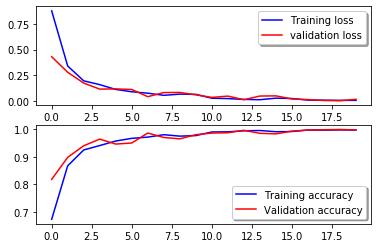

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
validation_generator = test_datagen.flow_from_directory(
                                                    'dataset/test',
                                                    target_size=(100, 100),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical',shuffle=False )

Found 359 images belonging to 12 classes.


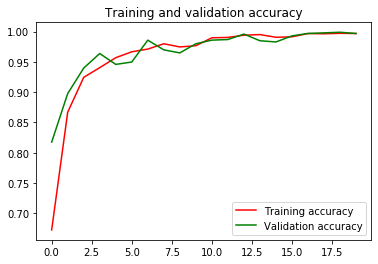

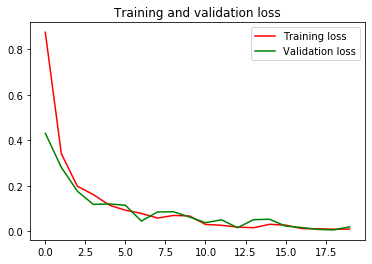

In [0]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))


plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()